# Capstone2 Exploratory Data Analysis for Mental Health Dataset

## Table of Contents
1. [Import Libraries](#1.-Import-Libraries)
2. [Review the Mental Health Dataset](#2.-Review-the-Mental-Health-Dataset)
    - 2.1 [Load the Data](#2.1-Load-the-Data)
        - 2.1.1 [Mental Health Data](#2.1.1-Mental-Health-Data)
    - 2.2 [Missing Data](#2.2-Missing-Data)
    - 2.3 [Analyzing Duplicates](#2.3-Analyzing-Duplicates)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    - 3.1 [Respondents by Country](#3.1-Respondents-by-Country)
    - 3.2 [Treatment by Country](#3.2-Treatment-by-Country)
    - 3.3 [Feature Distributions](#3.3-Feature-Distributions)
    - 3.4 [Bivariate Analysis](#3.4-Bivariate-Analysis)
        - 3.4.1 [Treatment by Gender](#3.4.1-Treatment-by-Gender)
        - 3.4.2 [Treatment by Self-Employed](#3.4.2-Treatment-by-Self-Employed)
        - 3.4.3 [Treatment by Family History](#3.4.3-Treatment-by-Family-History)
        - 3.4.4 [Treatment by Occupation](#3.4.4-Treatment-by-Occupation)
        - 3.4.5 [Treatment by Mental Health Interview](#3.4.5-Treatment-by-Mental-Health-Interview)
        - 3.4.6 [Treatment by Care Options](#3.4.6-Treatment-by-Care-Options)
    - 3.5 [Correlation Analysis](#3.5-Correlation-Analysis)
        - 3.5.1 [Heatmap](#3.5.1-Heatmap)
    - 3.6 [Interactions Between Features](#3.6-Interactions-Between-Features)
        - 3.6.1 [self_employed by family_history](#3.6.1-self_employed-by-family_history)
        - 3.6.2 [Growing_Stress by Gender](#3.6.2-Growing_Stress-by-Gender)
        - 3.6.3 [Growing_Stress by Days_Indoors](#3.6.3-Growing_Stress-by-Days_Indoors)
        - 3.6.4 [Work_Interest by Social_Weakness](#3.6.4-Work_Interest-by-Social_Weakness)
        - 3.6.5 [Growing_Stress by self_employed, treatment, Mood_Swings](#3.6.5-Growing_Stress-by-self_employed,-treatment,-Mood_Swings)
4. [Feature Engineering](#4.-Feature-Engineering)
    - 4.1 [Drop Timestamp](#4.1-Drop-Timestamp)
    - 4.2 [Convert Categorical Features to Numeric](#4.2-Convert-Categorical-Features-to-Numeric)
        - 4.2.1 [Binary Features](#4.2.1-Binary-Features)
        - 4.2.2 [Hot-Encode Non-binary Categorical Features](#4.2.2-Hot-Encode-Non-binary-Categorical-Features)
5. [Save Cleaned Data](#5.-Save-Cleaned-Data)
6. [Summary](#6.-Summary)


## 1. Import Libraries

In [2]:
# Import libraries for dataset operations
import numpy as np
import pandas as pd

# Import stats libraries
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot



## 2. Review the Mental Health Dataset

### 2.1 Load the Data

#### 2.1.1 Mental Health Data

In [3]:
 # Load data
df = pd.read_csv('../data/MentalHealthDataset.csv')

In [4]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [10]:
df.describe().T

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

### 2.2 Missing Data

In [12]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

**5202** rows have missing values in the 'self_employed' field.

To maintain the integrity of the analysis, we will assign 'Unknown' to the missing values.

By using 'Unknown' we avoid the introduction of bias when replacing values using imputation methods. This also helps to avoid changing the underlying distribution of the data.

By treating the missing values as a unique category, it can provide insights during analysis and allow us to see whether respondents with missing 'self_employed' data share certain characteristics. It serves as a signal to the model to treat these cases differently.


In [13]:
# Assign 'Unknown' to missing values in 'self_employed'
df['self_employed'] = df['self_employed'].fillna('Unknown')

In [14]:
df.self_employed.value_counts()

self_employed
No         257994
Yes         29168
Unknown      5202
Name: count, dtype: int64

In [15]:
# Check if there are any more missing data
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

Now we have 5202 'Unknown' Values instead of the previous 5202 missing values.

### 2.3 Analyzing Duplicates

In [16]:
print(f'Duplicate count: {df.duplicated().sum()}')

Duplicate count: 2313


There are **2313** duplicate records.

In [17]:
df.Timestamp.value_counts()

Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 16:21    1604
8/27/2014 12:39    1604
                   ... 
8/27/2014 23:54     390
8/27/2014 23:30     390
8/27/2014 23:14     390
8/27/2014 23:10     390
2/1/2016 23:04      390
Name: count, Length: 580, dtype: int64

Out of 292K records, there are only 580 unique time entries.
It is possible that these records were entered using batch method, that is why there are multiple rows having the same time entry.

Let us check how these duplications are spread across the time entry groups. 

In [18]:
aggregated_df = df.groupby(['Timestamp'])
groups = aggregated_df.groups

#groups
total_dups = 0
group_dups = 0 

for name in groups:
    group = aggregated_df.get_group((name,))
    dups = group.duplicated().sum()
    if dups != 0:
        #print(f'Group: {name}, Countries: {group.Country.unique()}, duplicates: {dups}')
        total_dups += dups
        group_dups += 1
print(f'Total Duplicates: {total_dups}, Groups with Duplicates: {group_dups} out of {len(groups)}')


Total Duplicates: 2313, Groups with Duplicates: 122 out of 580


We will keep the duplicates in our dataset. Instead, we are going to focus on ensuring these duplications are properly distributed in our training models, allowing us to take advantage of the valuable insights they may offer without compromising the dataset's integrity.

## 3. Exploratory Data Analysis

### 3.1 Respondents by Country

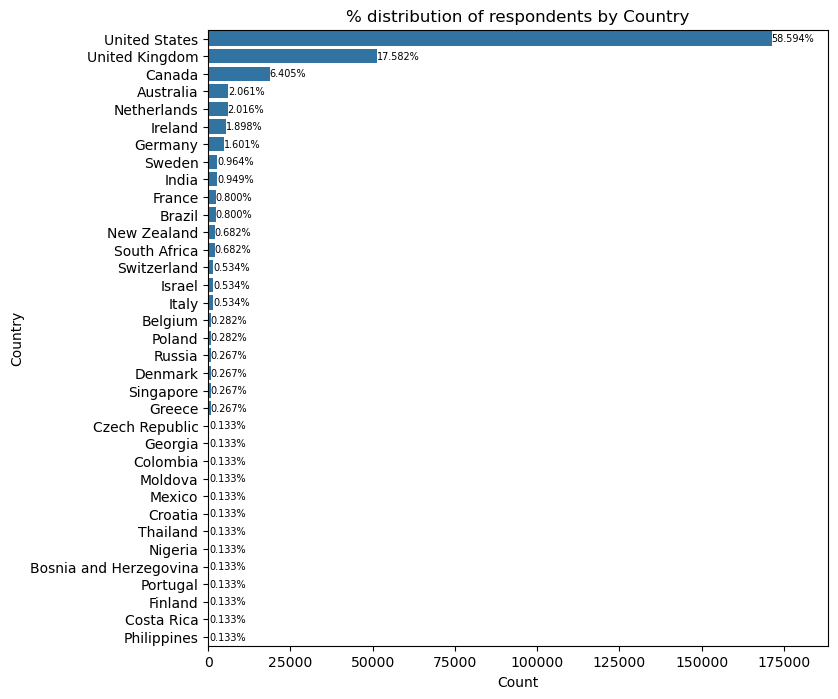

In [19]:
# Calculate counts and percentages
count_data = df['Country'].value_counts().reset_index()
count_data.columns = ['Country', 'Count']
count_data['Percentage'] = (count_data['Count'] / count_data['Count'].sum()) * 100

# Create horizontal count plot
plt.figure(figsize=(8, 8))
sns.barplot(data=count_data, y='Country', x='Count')

# Annotate bars with percentages
for index, row in count_data.iterrows():
    plt.text(row['Count'], index, f'{row["Percentage"]:.3f}%', va='center', fontsize=7)

# Labels and title
plt.xlabel('Count')
plt.legend
plt.ylabel('Country')
plt.title('% distribution of respondents by Country')
plt.xlim(0, count_data['Count'].max() * 1.1)  # Adjust x-axis limit for better spacing

plt.show()

### 3.2 Treatment by Country

<Figure size 800x800 with 0 Axes>

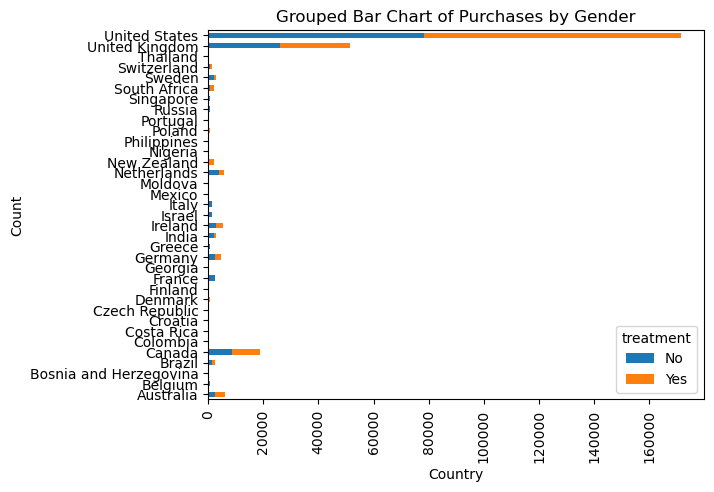

In [20]:
plt.figure(figsize=(8, 8))
# Create a cross-tabulation
crosstab = pd.crosstab(df['Country'], df['treatment'])
# Create a grouped bar chart
crosstab.plot(kind='barh', stacked=True)
plt.title('Grouped Bar Chart of Purchases by Gender')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='treatment')
plt.xticks(rotation=90)

plt.show()

### 3.3 Feature Distributions

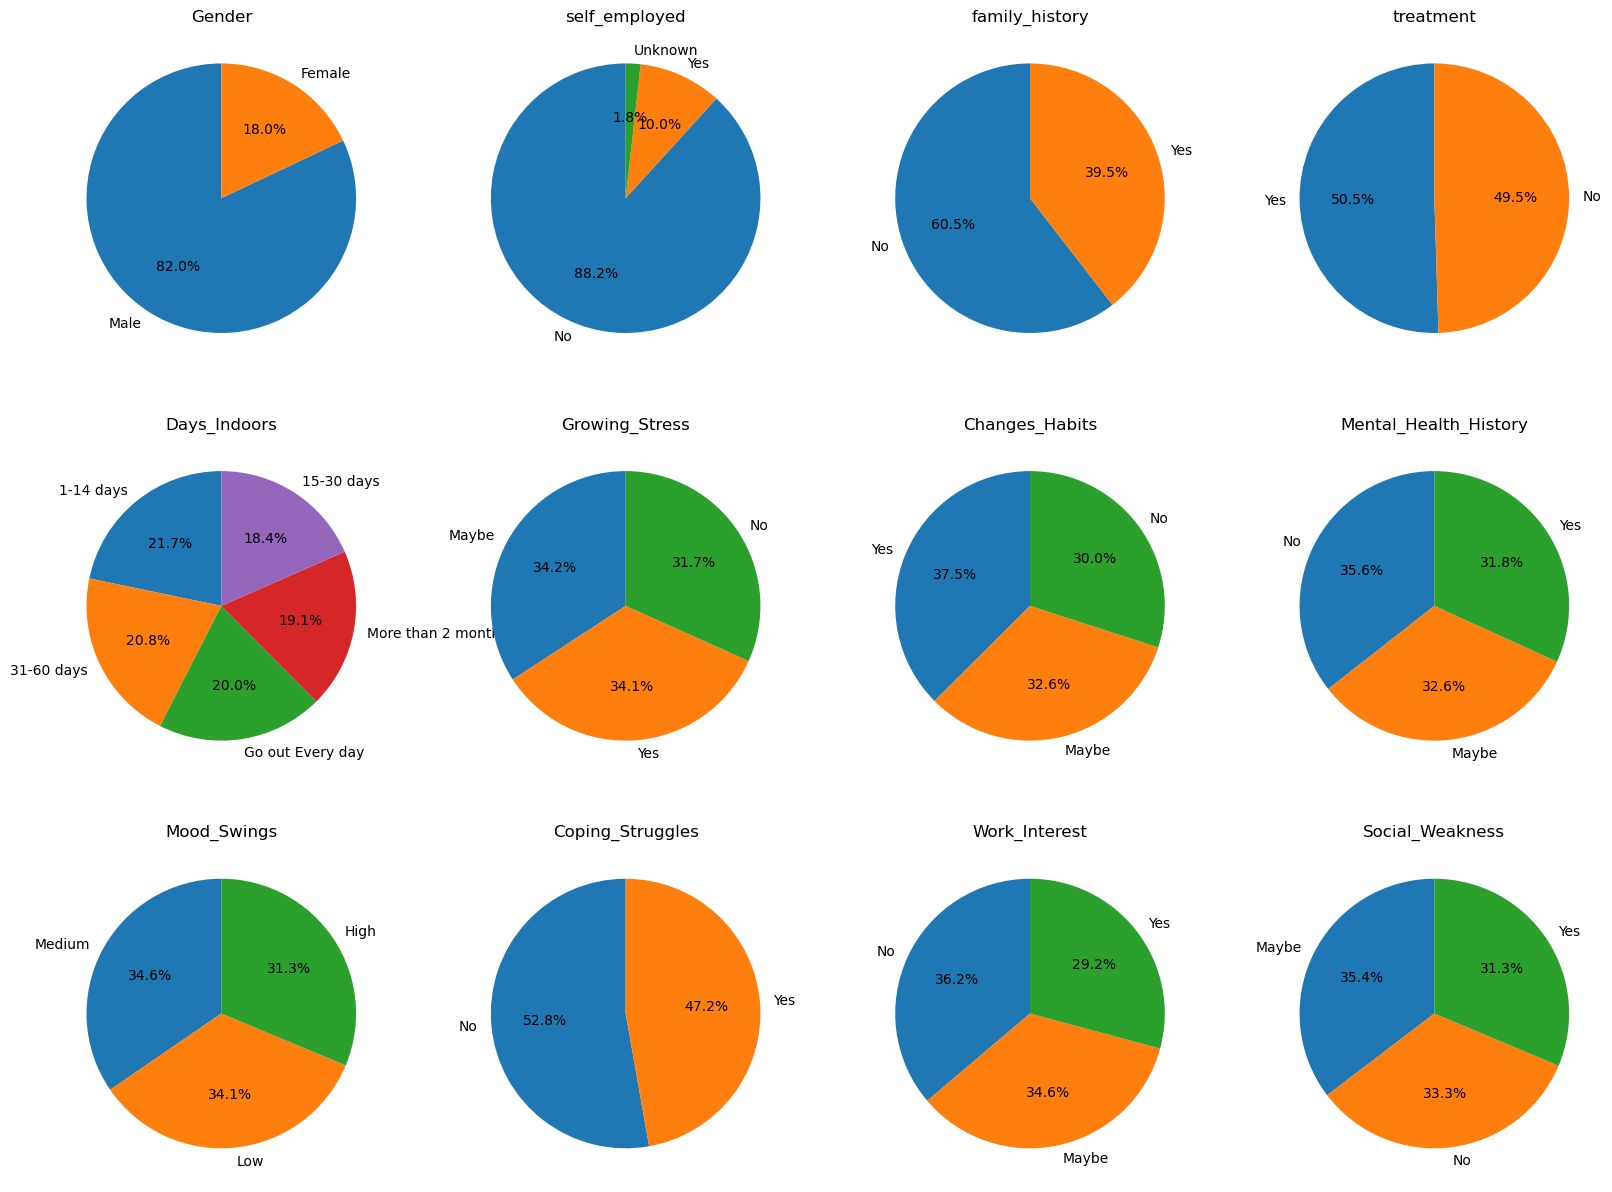

In [21]:

cols_to_visualize = ['Gender','self_employed','family_history', 'treatment', 'Days_Indoors',
                     'Growing_Stress','Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness']
counts = []

for col in cols_to_visualize:
    counts.append(df[col].value_counts())
    
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)
    axs[i].grid(False)

plt.show()

- **Gender** - 80% of respondents are Male.
- **self_employed** - 10% reported as self_employed with less than 2% reporting as Unknown.
- **treatment** - 50% reported having treatment.

### 3.4 Bivariate Analysis
#### Show the proportions of the target categories ('treatment') for each feature category.


In [22]:
def explore_feature_vs_target(data, feature, target):
    """
        Explore how a categorical feature relates to the target 
        using cross-tab and grouped bar chart.
    """
    # Cross-tabulation
    crosstab = pd.crosstab(data[feature], data[target], normalize='index')
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    fmt_crosstab = crosstab_pct.map(lambda x: f"{x:.2f}%")
    print(fmt_crosstab)
    
    # Plotting the grouped bar chart
    ax = sns.countplot(x=feature, hue=target, data=data)
    
    for i in ax.containers:
        ax.bar_label(i, fmt='{:,.0f}', fontsize=9)
            
    plt.title(f'{target} by {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target, loc='center')
    plt.xticks(rotation=90)
    _ = plt.tight_layout()
    plt.show()
    
# Show charts.
#

# Loop through all independent features.

# Get included predictors
#df_chart = df.drop(columns=['Timestamp', 'Country'], axis=True)
#columns = df_chart.drop(['treatment'], axis=1).columns
## Set dimensions
#plt.figure(figsize=(8, 6))
## Show 
#for feature in columns:
#    explore_feature_vs_target(df_chart, feature, 'treatment')
_ = plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

#### 3.4.1 Treatment by Gender

treatment      No     Yes
Gender                   
Female     30.58%  69.42%
Male       53.66%  46.34%


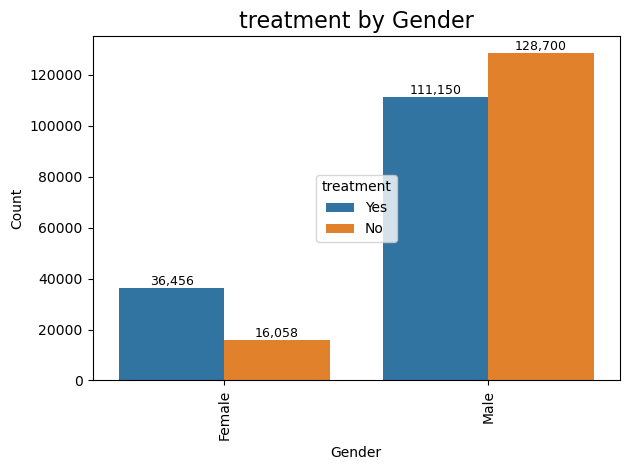

In [23]:
explore_feature_vs_target(df, 'Gender', 'treatment')

#### 3.4.2 Treatment by Self-Employed

treatment          No     Yes
self_employed                
No             50.21%  49.79%
Unknown        44.98%  55.02%
Yes            44.12%  55.88%


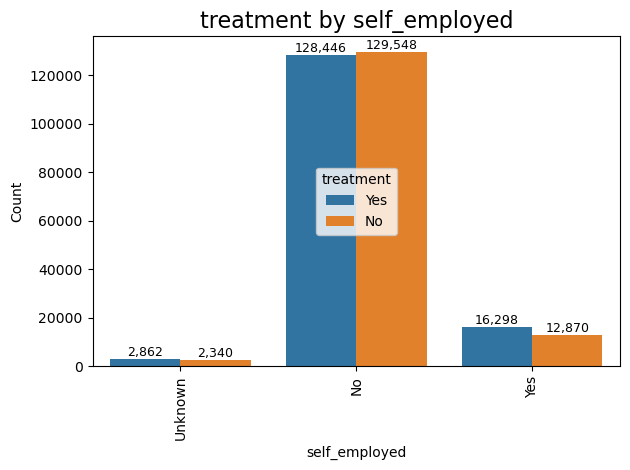

In [24]:
explore_feature_vs_target(df, 'self_employed', 'treatment')

#### 3.4.3 Treatment by Family History

treatment           No     Yes
family_history                
No              64.34%  35.66%
Yes             26.83%  73.17%


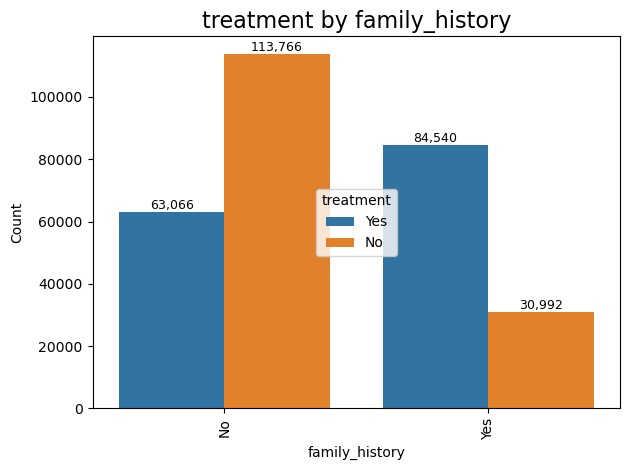

In [25]:
explore_feature_vs_target(df, 'family_history', 'treatment')

#### 3.4.4 Treatment by Occupation

treatment       No     Yes
Occupation                
Business    49.26%  50.74%
Corporate   50.28%  49.72%
Housewife   49.62%  50.38%
Others      49.11%  50.89%
Student     49.18%  50.82%


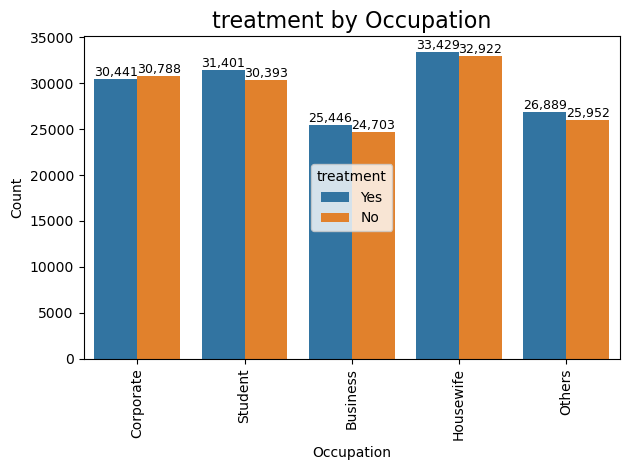

In [26]:
explore_feature_vs_target(df, 'Occupation', 'treatment')

#### 3.4.5 Treatment by Mental Health Interview

treatment                    No     Yes
mental_health_interview                
Maybe                    60.08%  39.92%
No                       47.31%  52.69%
Yes                      45.73%  54.27%


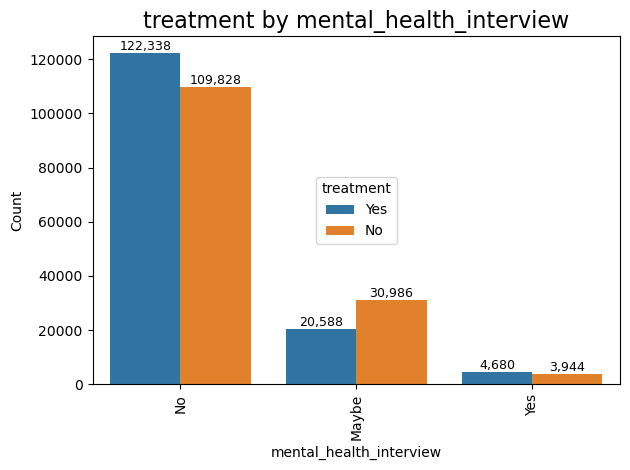

In [27]:
explore_feature_vs_target(df, 'mental_health_interview', 'treatment')

#### 3.4.6 Treatment by Care Options

treatment         No     Yes
care_options                
No            59.16%  40.84%
Not sure      60.64%  39.36%
Yes           28.48%  71.52%


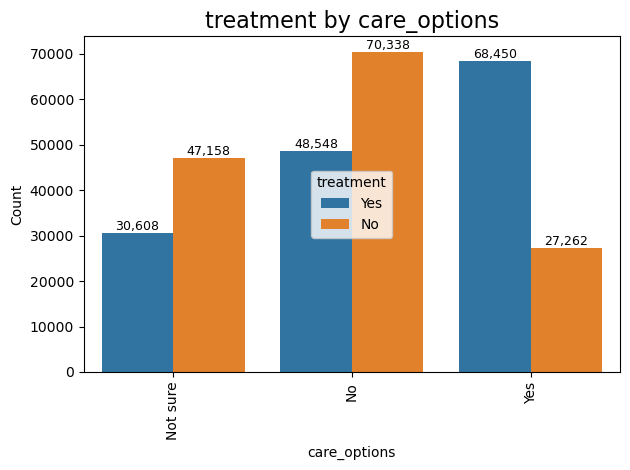

In [28]:
explore_feature_vs_target(df, 'care_options', 'treatment')

treatment           No     Yes
Growing_Stress                
Maybe           50.03%  49.97%
No              49.71%  50.29%
Yes             48.81%  51.19%


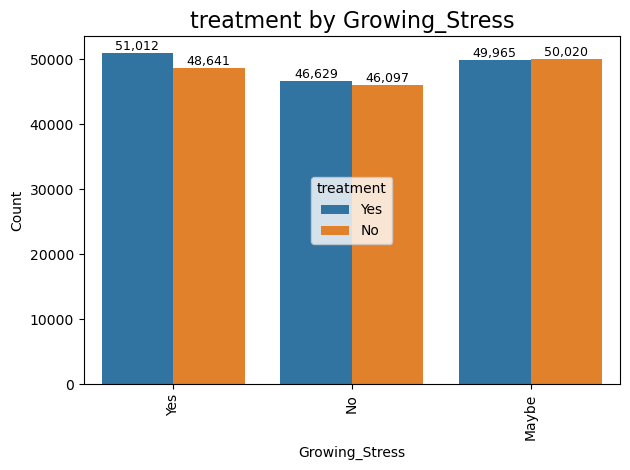

In [29]:
explore_feature_vs_target(df, 'Growing_Stress', 'treatment')

### 3.5 Correlation Analysis
#### Calculate statistical relationships (e.g., Cramér's V for categorical variables) between (**'treatment'**) and independent variables.

In [30]:
# Calculate Cramer's V
def cramers_v(x, y):
    # Create a contingency table
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# Generate a matrix of CV for all categorical features
def ordinal_cramers_v_matrix(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    n = len(categorical_cols)
    cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=categorical_cols, columns=categorical_cols)
    
    for i in range(n):
        for j in range(i, n):
            v = cramers_v(df[categorical_cols[i]], df[categorical_cols[j]])
            cramers_v_matrix.iloc[i, j] = v
            cramers_v_matrix.iloc[j, i] = v  # Symmetric matrix

    return cramers_v_matrix

#### 3.5.1 Heatmap

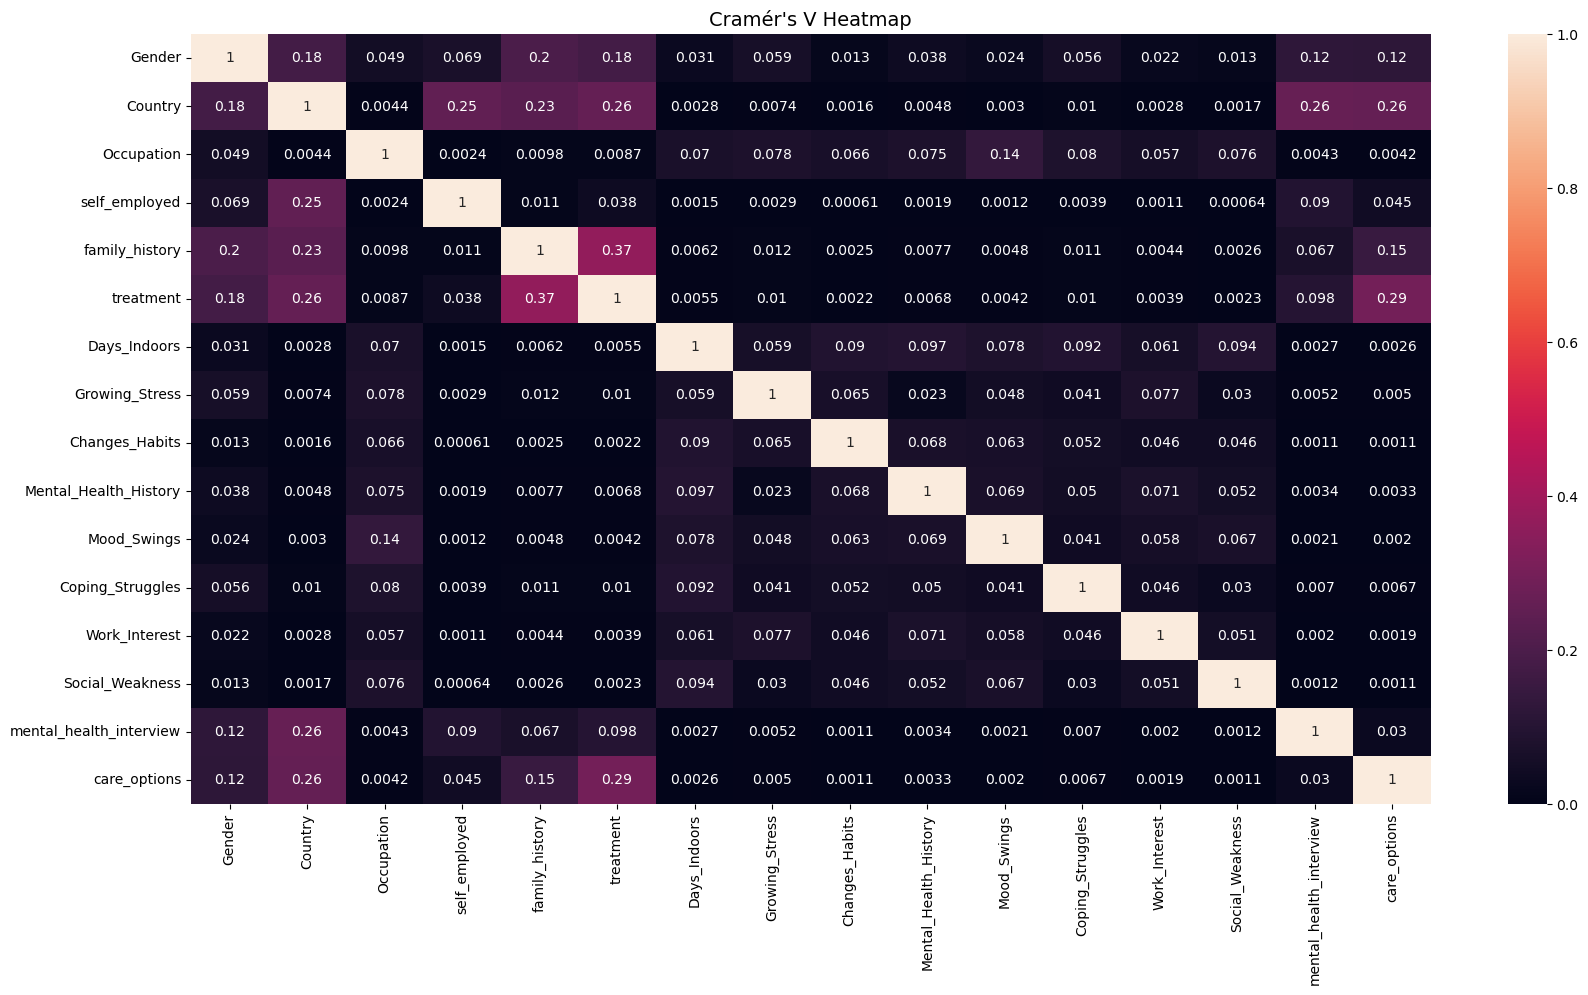

In [31]:
# Draw the heatmap to calculate CV correlation between features.

cramers_v_df = ordinal_cramers_v_matrix(df.drop(columns='Timestamp', axis=1))

# Visualize the matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cramers_v_df, annot=True, vmin=0, vmax=1)
plt.title("Cramér's V Heatmap", fontsize=14)
plt.show()

Based on the Correlation Threshold:
- **Weak**: 0.1 to 0.3
- **Moderate**: 0.3 to 0.5
- **Strong**: > 0.5 but not 1

Results show there are 4 features that have weak to moderate correlation to **'treatment'**.
- Gender: **0.18**
- Country: **0.25**
- family_history: **0.37**
- care_options: **0.29**

#### What is the relationship between mental-health related features and **'treament'**?

- **Days_Indoors**: Very weak to no relationship at **0.0055**.
- **Growing_Stress**: Very weak at **0.01**.
- **Changes_Habits**: Very weak to no relationship at **0.002**.
- **Mental_Health_History**: Very weak to no relationship at **0.0068**.
- **Coping_Struggles**: Very weak at 0.01.
- **Work_Interest**: Very weak to no relationship at **0.0039**.
- **Social_Weakness**: Very weak to no relationship at **0.0023**.
- **Mental_Health_Interview**: Very weak at **0.098**.
  
The mental health dataset features have non-linear relationships, which means the factors that influences whether a patient needs mental health may interact in more complex ways than a simple direct or inverse relationship. 

Testing with non-linear models (like **Random-Forest**, **XGBoost**, or **SVM** with non-linear kernels) can help to uncover patterns that may be missed by linear models.

### 3.6 Interactions Between Features

#### 3.6.1 self_employed by family_history 

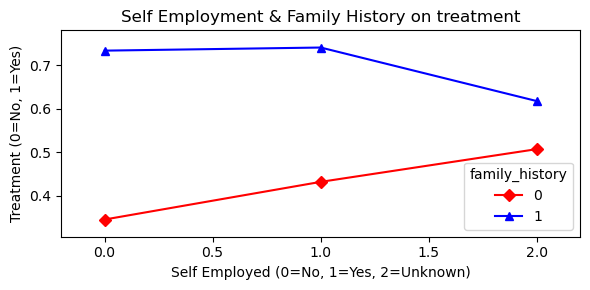

In [32]:
# Chart interaction between self_employed, family_history, and treatment
df_ = df[['self_employed', 'family_history', 'treatment']]

# Map the values using the mapping dictionary
mapping = {
    'Yes': 1,
    'No': 0,
    'Unknown': 2
}
df_.loc[:,'self_employed'] = df['self_employed'].map(mapping)

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
df_.loc[:,'family_history'] = le.fit_transform(df['family_history'])  # Yes=1, No=0
df_.loc[:,'treatment'] = le.fit_transform(df['treatment'])  # Yes=1, No=0

# Create an interaction plot
fig, ax = plt.subplots(figsize=(6, 3))
interaction_plot(df_['self_employed'], df_['family_history'], df_['treatment'], 
                 colors=['red', 'blue'], markers=['D', '^'], ax=ax)

# Add title and labels
plt.title('Self Employment & Family History on treatment')
plt.xlabel('Self Employed (0=No, 1=Yes, 2=Unknown)')
plt.ylabel('Treatment (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

For **self_employed** with no **family_history**, the tendency is to seek treatment.

For both non and **self_employed** with a **family_history**, inviduals resort to treatment, but trends down with **'Unknown'** employment status.

#### 3.6.2 Growing_Stress by Gender

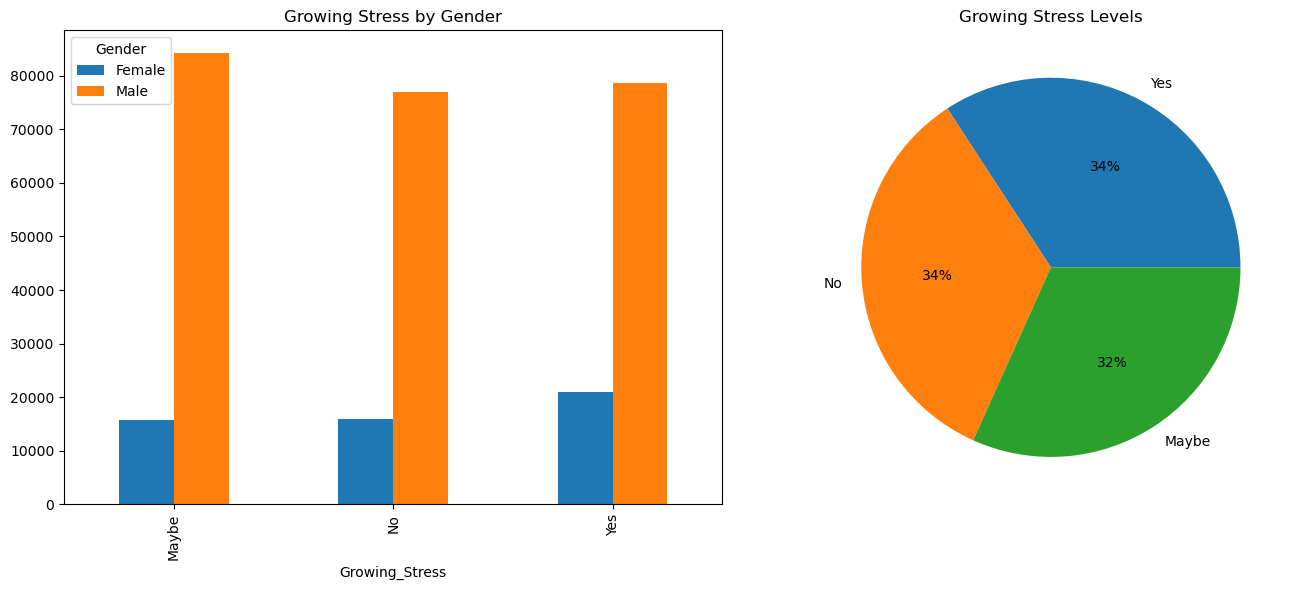

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of Growing_Stress among Gender
df_ = pd.crosstab(df['Growing_Stress'], df['Gender'])
df_.plot(kind='bar', ax=axs[0])
axs[0].set_title('Growing Stress by Gender')
axs[0].grid(False)

# Pie plot
axs[1].pie(
    df['Growing_Stress'].value_counts(), 
    labels=['Yes', 'No', 'Maybe'], 
    autopct='%.0f%%', 
)
axs[1].set_title('Growing Stress Levels')

plt.tight_layout()
plt.show()

- Males reported growing stress with high tendency towards being unsure (Maybe) about their stress condition.
- Females also reported growing stress.

#### 3.6.3 Growing_Stress by Days_Indoors

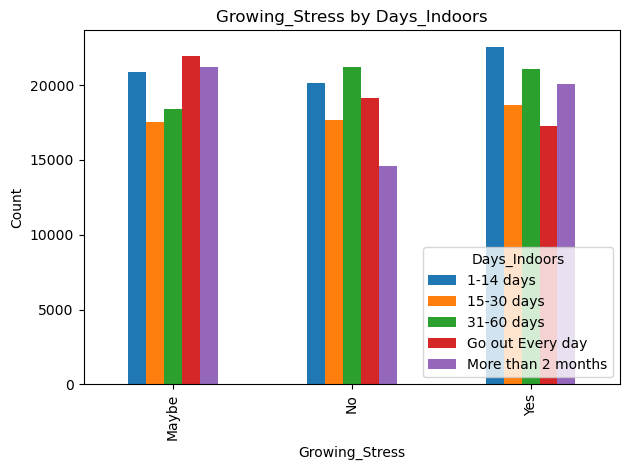

In [34]:
# Bar plot of Growing_Stress among Days_Indoors
df_ = pd.crosstab(df['Growing_Stress'], df['Days_Indoors'])
df_.plot(kind='bar')

plt.title('Growing_Stress by Days_Indoors')
plt.xlabel('Growing_Stress')
plt.ylabel('Count')
plt.legend(title='Days_Indoors', loc='lower right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- There is less Growing_Stress for people who go out every day.
- There is a high increase in Growing_Stress for people who stay indoors for 1 to 14 days.
- There is significant Growing_Stress for people who stay indoors for more than 2 months.
- There is very minimal rate of Growing_Stress for people who stay indoors for 31 to 60 days.
- There is a slight increase in Growing_Stress for people who stay indoors for 15 to 30 days.

There is a fair distribution of Growing_Stress responders to 'Maybe', 'No', and 'Yes'. 

**For 'Maybe' responders:**
- Growing_Stress is highest for people who go out everyday.
- Growing_Stress is higher than for those who responded 'Yes' or 'No'.
- Growing_Stress is less significant for people who stayed indoors for 31 to 60 days, than the 'Yes', and 'No' responders.
- There is a slight decrease in Growing_Stress for people who stayed indoors for 15 to 30 days.

There is a pattern of Growing_Stress for people who stay indoors, but then a third of the population are unsure of their condition. 

The 'Maybe' population tends to contradict the patterns of the 'Yes' and the 'No' population.

**Next Steps:**

For this trend to even be meaningful, we need to find a way to model the **'Maybe'** so we can determine if the answer is actually a 'Yes or a 'No'.

#### 3.6.4 Work_Interest by Social_Weakness

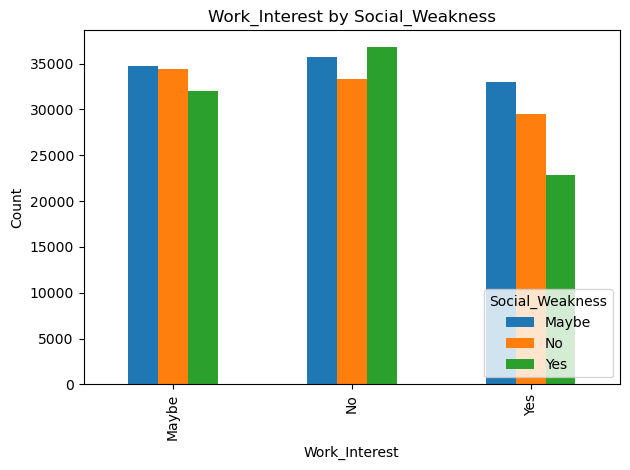

In [35]:
# Bar plot of Growing_Stress among Changes_Habits
df_ = pd.crosstab(df['Work_Interest'], df['Social_Weakness'])
df_.plot(kind='bar')

plt.title('Work_Interest by Social_Weakness')
plt.xlabel('Work_Interest')
plt.ylabel('Count')
plt.legend(title='Social_Weakness', loc='lower right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There is low Social_Weakness where there is high Work_Interest.

#### 3.6.5 Growing_Stress by self_employed, treatment, Mood_Swings

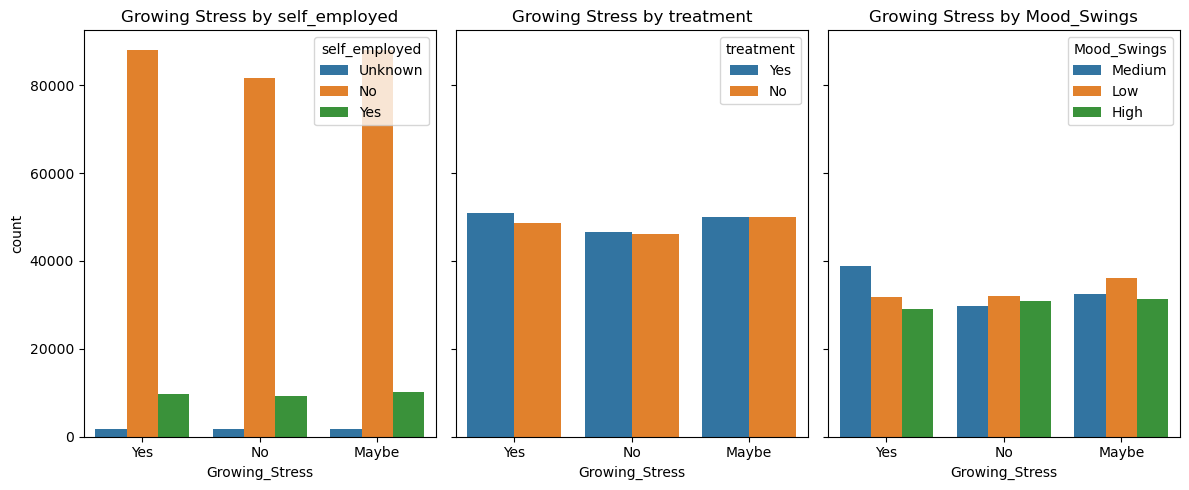

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
sns.countplot(x='Growing_Stress', hue='self_employed', data=df, ax=axs[0])
axs[0].set_title('Growing Stress by self_employed')
axs[0].grid(False)
sns.countplot(x='Growing_Stress', hue='treatment', data=df, ax=axs[1])
axs[1].set_title('Growing Stress by treatment')
axs[1].grid(False)
sns.countplot(x='Growing_Stress', hue='Mood_Swings', data=df, ax=axs[2])
axs[2].set_title('Growing Stress by Mood_Swings')
axs[2].grid(False)
plt.tight_layout()
plt.show()

## 4. Feature Engineering

### 4.1 Drop Timestamp

We are dropping timestamp as we are not interested in the captured time of the record.

In [37]:
df.drop(labels='Timestamp', axis=1, inplace=True)

### 4.2 Convert Categorical Features to Numeric

#### 4.2.1 Binary Features

Convert 'Yes', 'No' values to '1', and  '0' respectively.

Do not include 'Gender' as it is a nominal value and should treat 'Male' and 'Female' as features.

In [38]:
# Convert binary features to numeric 1 or 0:
convert_dict = {
    'Yes': 1,
    'No': 0
}

# Coping_Struggles, family_history, treatment
for col in df:
    if len(df[col].unique()) == 2 and col != 'Gender':
        df[col] = df[col].apply(lambda x: convert_dict.get(x, x))
        print(f'feature: {col}, values: {df[col].unique()}')


feature: family_history, values: [0 1]
feature: treatment, values: [1 0]
feature: Coping_Struggles, values: [0 1]


#### 4.2.2 Hot-Encode Non-binary Categorical Features

In [39]:
# Hot-encode non-binary features
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Convert
df_encoded = df_encoded.astype(int)

In [40]:
desc = df_encoded.describe(include='all').T

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show all rows and columns
desc

,count,mean,std,min,25%,50%,75%,max
family_history,292364.0,0.395165,0.488887,0.0,0.0,0.0,1.0,1.0
treatment,292364.0,0.504871,0.499977,0.0,0.0,1.0,1.0,1.0
Coping_Struggles,292364.0,0.472137,0.499224,0.0,0.0,0.0,1.0,1.0
Gender_Male,292364.0,0.820381,0.383870,0.0,1.0,1.0,1.0,1.0
Country_Belgium,292364.0,0.002818,0.053014,0.0,0.0,0.0,0.0,1.0
Country_Bosnia and Herzegovina,292364.0,0.001334,0.036499,0.0,0.0,0.0,0.0,1.0
Country_Brazil,292364.0,0.008004,0.089105,0.0,0.0,0.0,0.0,1.0
Country_Canada,292364.0,0.064050,0.244843,0.0,0.0,0.0,0.0,1.0
Country_Colombia,292364.0,0.001334,0.036499,0.0,0.0,0.0,0.0,1.0
Country_Costa Rica,292364.0,0.001334,0.036499,0.0,0.0,0.0,0.0,1.0


In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 64 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   family_history                   292364 non-null  int64
 1   treatment                        292364 non-null  int64
 2   Coping_Struggles                 292364 non-null  int64
 3   Gender_Male                      292364 non-null  int64
 4   Country_Belgium                  292364 non-null  int64
 5   Country_Bosnia and Herzegovina   292364 non-null  int64
 6   Country_Brazil                   292364 non-null  int64
 7   Country_Canada                   292364 non-null  int64
 8   Country_Colombia                 292364 non-null  int64
 9   Country_Costa Rica               292364 non-null  int64
 10  Country_Croatia                  292364 non-null  int64
 11  Country_Czech Republic           292364 non-null  int64
 12  Country_Denmark               

## 5. Save Cleaned Data

In [ ]:
# Save cleaned dataset to file 'MentalHealthCleaned.csv'
df_encoded.to_csv('./data/MentalHealthCleaned.csv', index=False)

## 6. Summary

In this Exploratory Data Analysis (EDA) phase, we have examined and identified potential areas for further investigation, while also refining the dataset based on the insights gained to better prepare it for the upcoming pre-processing and modeling stages.

The following is a summary of the key steps taken after completing the [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis) (EDA):

- **Missing data** in feature **self-employed** was addressed by introducing a 3rd category, instead of imputing values. The feature now have 3 categories, namely: 'Yes', 'No', and 'Unknown' for the missing category.
See [Missing Data](#2.2-Missing-Data) for reference.
- **Duplicate records** - We identified duplicate entries with identical values across all features. These duplicates will be retained, with particular attention given to ensuring they are appropriately handled to prevent any negative impact on our analysis during the pre-processing and modeling stages. See [Analyzing Duplicates](#2.3-Analyzing-Duplicates) for reference. 
- **Feature selection** to identify the most relevant variables.
    - We decided to not include 'Timestamp' in the final selection of features.
    - Retained all other features and transformed appropriately.
- Handle **outliers** and anomalies in the data.
    - The mental-health dataset has categorical only features. No outlier analysis is required. 
- **Transformed** categorical data into appropriate formats for modeling.
    - All binary features were mapped to it's numeric equivalent,
    - while the non-binary features were hot-encoded so as not to introduce ordinality in each feature category.
    - There are now 64 features in the final dataset and are all converted to its numeric categorical values.
- **Standardized** or **normalized** numerical features as needed.
    - No numerical features were found.
- **Next Step:**
    - Split the dataset into training and test sets for model evaluation.
